In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
city_ride_df = pd.merge(city_df, ride_df, on="city")
city_ride_df = city_ride_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [2]:
city_ride_grouped = city_ride_df.groupby("city")

avg_fare_city = city_ride_grouped["fare"].mean()
avg_fare_city.head()

total_rides_city = city_ride_grouped["ride_id"].count()
total_rides_city.head()

total_drivers_city = city_ride_grouped["driver_count"].mean()
total_drivers_city.head()

city_type = city_df.set_index("city")["type"]
city_type.head()

df = pd.DataFrame({"Average Fare Per City": avg_fare_city, 
                  "Total Rides Per City": total_rides_city, 
                  "Total Drivers Per City": total_drivers_city, 
                  "City Type": city_type})
df.head()

,Average Fare Per City,Total Rides Per City,Total Drivers Per City,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [3]:
urban = df.loc[df["City Type"] == "Urban"]

suburban = df.loc[df["City Type"] == "Suburban"]

rural = df.loc[df["City Type"] == "Rural"]

## Bubble Plot of Ride Sharing Data

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


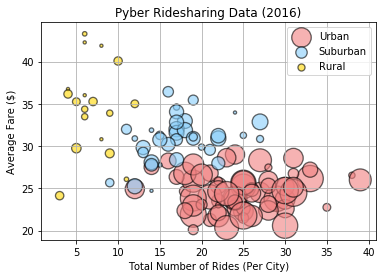

In [4]:
# Build the scatter plots for each city types
plt.scatter(urban["Total Rides Per City"], urban["Average Fare Per City"], 
            color="lightcoral", edgecolor="black", alpha=0.6, marker="o", 
            linewidth=1.3, s=urban["Total Drivers Per City"] * 10, label="Urban")

plt.scatter(suburban["Total Rides Per City"], suburban["Average Fare Per City"], 
            color="lightskyblue", edgecolor="black", alpha=0.6, marker="o", 
            linewidth=1.3, s=suburban["Total Drivers Per City"] * 10, label="Suburban")

plt.scatter(rural["Total Rides Per City"], rural["Average Fare Per City"], 
            color="gold", edgecolor="black", alpha=0.6, marker="o", 
            linewidth=1.3, s=rural["Total Drivers Per City"] * 10, label="Rural")

plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc="best fit")
plt.grid()

# Save Figure
plt.savefig("Pyber_Bubble_plot.png")

# Show plot
plt.show()

## Total Fares by City Type

In [5]:
total_city_fare = city_ride_grouped["fare"].sum()
total_city_fare.head()

total_rides_city.head()

total_drivers_city.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [6]:
pie_df = pd.DataFrame({"Total Fare Per City": total_city_fare, 
                      "Total Rides Per City": total_rides_city, 
                      "Total Drivers Per City": total_drivers_city, 
                      "City Type": city_type})
pie_df.head()

,Total Fare Per City,Total Rides Per City,Total Drivers Per City,City Type
Amandaburgh,443.55,18,12,Urban
Barajasview,557.31,22,26,Urban
Barronchester,582.76,16,11,Suburban
Bethanyland,593.21,18,22,Suburban
Bradshawfurt,400.64,10,7,Rural


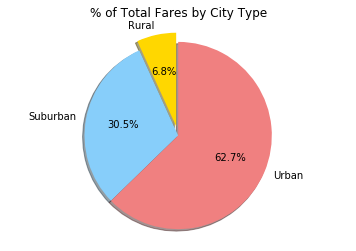

In [7]:
pie_grouped = pie_df.groupby("City Type")
pie_grouped["Total Fare Per City"].sum()

pie_grouped["Total Rides Per City"].sum()

pie_grouped["Total Drivers Per City"].sum()

# Build Pie Chart
city_types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)

plt.pie(pie_grouped["Total Fare Per City"].sum(), explode=explode, labels=city_types, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("%_FaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

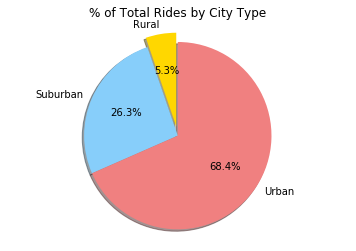

In [8]:
# Build Pie Chart
plt.pie(pie_grouped["Total Rides Per City"].sum(), explode=explode, labels=city_types, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("%_RidesbyCityType.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

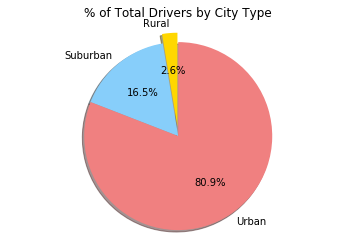

In [10]:
# Build Pie Charts
plt.pie(pie_grouped["Total Drivers Per City"].sum(), explode=explode, labels=city_types, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("%_DriversbyCityType.png")
plt.show()

In [11]:
# Show Figure
plt.show()